In [18]:
import sys
import pandas as pd
import pyodbc as db
import hdbscan
from sklearn.datasets import make_blobs


try:
    print("Connecting to SQL Server database")
    connection_string = 'DSN=ETL;'
    conn = db.connect(connection_string)
    csr = conn.cursor()
    sql = "SELECT FirstName FROM DimCustomer"
    df1 = pd.read_sql(sql,conn)
    conn.commit()
    csr.close()
    conn.close()
except:
    sys.exit("ERROR: Unable to query table or write file")

Connecting to SQL Server database


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df1['FirstName'])
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_labels = clusterer.fit_predict(X)

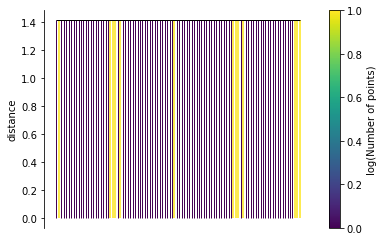

In [16]:
clusterer = hdbscan.RobustSingleLinkage(cut=0.125, k=7)
cluster_labels = clusterer.fit_predict(X)
hierarchy = clusterer.cluster_hierarchy_
alt_labels = hierarchy.get_clusters(0.100, 5)
hierarchy.plot()

In [20]:
cluster_labels

array([ 82,  83, 122, ..., 444, 386,  43], dtype=int64)